### Stereo Disparity for Depth Perception Testing ###

In [1]:
# ref: https://learnopencv.com/introduction-to-epipolar-geometry-and-stereo-vision/
# ref: https://learnopencv.com/depth-perception-using-stereo-camera-python-c/
# ref imgs: https://vision.middlebury.edu/stereo/data/scenes2014/

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

In [3]:
import sys
sys.path.append('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV')
import OpCV_Utils

In [4]:
imgs_path1 = 'C:/Users/Mafeus/Desktop/Bicycle1-perfect'
imgs_path2 = 'C:/Users/Mafeus/Desktop/Bicycle1-imperfect'

In [46]:
# Reading the left and right images of the same scene:
imgL = cv2.imread(imgs_path1 + "/im0.png", 0)
imgR = cv2.imread(imgs_path1 + "/im1.png", 0)

# Setting parameters for StereoSGBM algorithm:
minDisparity = 0
numDisparities = 256
blockSize = 12
disp12MaxDiff = 1
uniquenessRatio = 40
speckleWindowSize = 40
speckleRange = 12

# Creating an object of StereoSGBM algorithm:
stereo = cv2.StereoSGBM_create(minDisparity = minDisparity,
        numDisparities = numDisparities,
        blockSize = blockSize,
        disp12MaxDiff = disp12MaxDiff,
        uniquenessRatio = uniquenessRatio,
        speckleWindowSize = speckleWindowSize,
        speckleRange = speckleRange
    )

# Calculating disparith using the StereoSGBM algorithm:
start = time.time()
disp = stereo.compute(imgL, imgR).astype(np.float32)
end = time.time()

print('Process Time: ', end - start)

# Conversion to BGR
disp = disp.astype('uint8')
disp = cv2.cvtColor(disp, cv2.COLOR_GRAY2BGR)

Process Time:  8.322795391082764


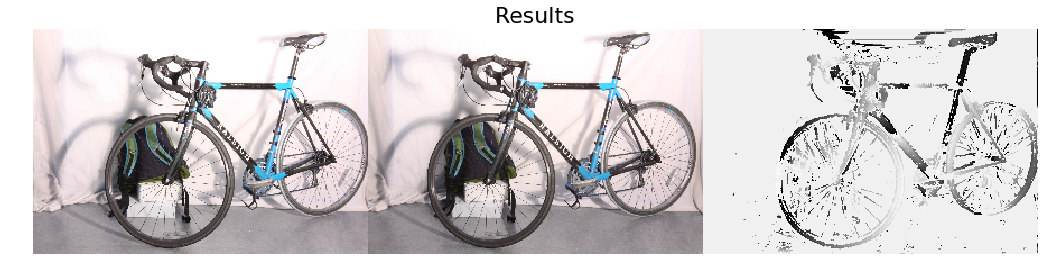

In [47]:
imgL = cv2.imread(imgs_path1 + "/im0.png")
imgR = cv2.imread(imgs_path1 + "/im1.png")
imgs_array = [[imgL, imgR, disp]]
stack = OpCV_Utils.stackImgs(imgs_array, scale = 0.1)
OpCV_Utils.show_single_img_plt(stack, 'Results', fig_size = (18,15))

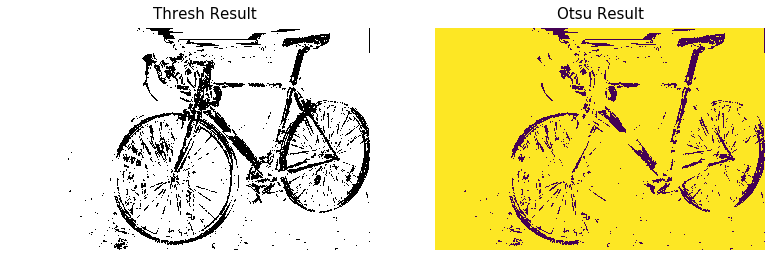

In [60]:
thresh = 230
_, img_otsu = cv2.threshold(disp.copy()[:,:,0], 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
_, img_thresh = cv2.threshold(disp.copy(), thresh, 255, cv2.THRESH_BINARY)

OpCV_Utils.show_multiple_imgs_plt([[img_thresh, img_otsu]], [['Thresh Result', 'Otsu Result']], fig_size=(13,13))

Press K to break.

Final Dilation Iterations: 2
Final Erosion Iterations: 0
Final Canny Thresh: (255, 255)


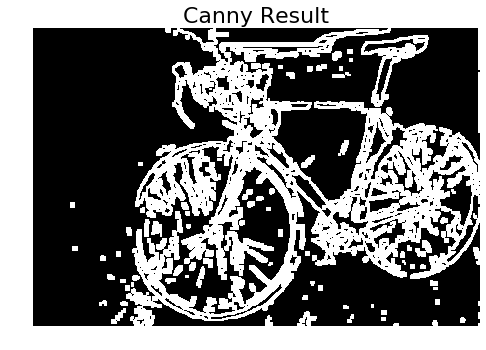

In [61]:
img_canny = OpCV_Utils.canny_trackbars(img_thresh.copy(), img_resize=(480,320), krnl_size = (2,2), stack_scale=0.5)
OpCV_Utils.show_single_img_plt(cv2.cvtColor(img_canny, cv2.COLOR_GRAY2RGB), 'Canny Result', fig_size=(8,8))